In [1]:
from src.utils.PathManager import Paths as Path 
from src.utils.Visualisation import plot_ROC_simple
from src.utils.BayesianLabel import * 
import pandas as pd 
import numpy as np 
import yaml 
from datetime import timedelta
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
well_id = "TIRRA80"

In [4]:
labeler = BayesianLabeler(well_id)
agg_df = labeler.output()

c:\Users\HoangLe\Desktop\Consilium_ROC_HOANG\app\src\utils\BayesianLabel.py:135: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = sub_df[weather_label.weather_label == 0].index


In [30]:
df = get_data(well_id)
agg_df =get_agg_df(df)
agg_df = get_integral_features(agg_df,['ROC_VOLTAGE'])
sub_df,rolling_mean,rolling_std = get_running_features(agg_df,feature_list=['ROC_VOLTAGE_day_integral','ROC_VOLTAGE_night_integral'])
label = get_weather_label(sub_df,rolling_mean,rolling_std,{'ROC_VOLTAGE_day_integral':"lt", "ROC_VOLTAGE_night_integral":"lt"},2.3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


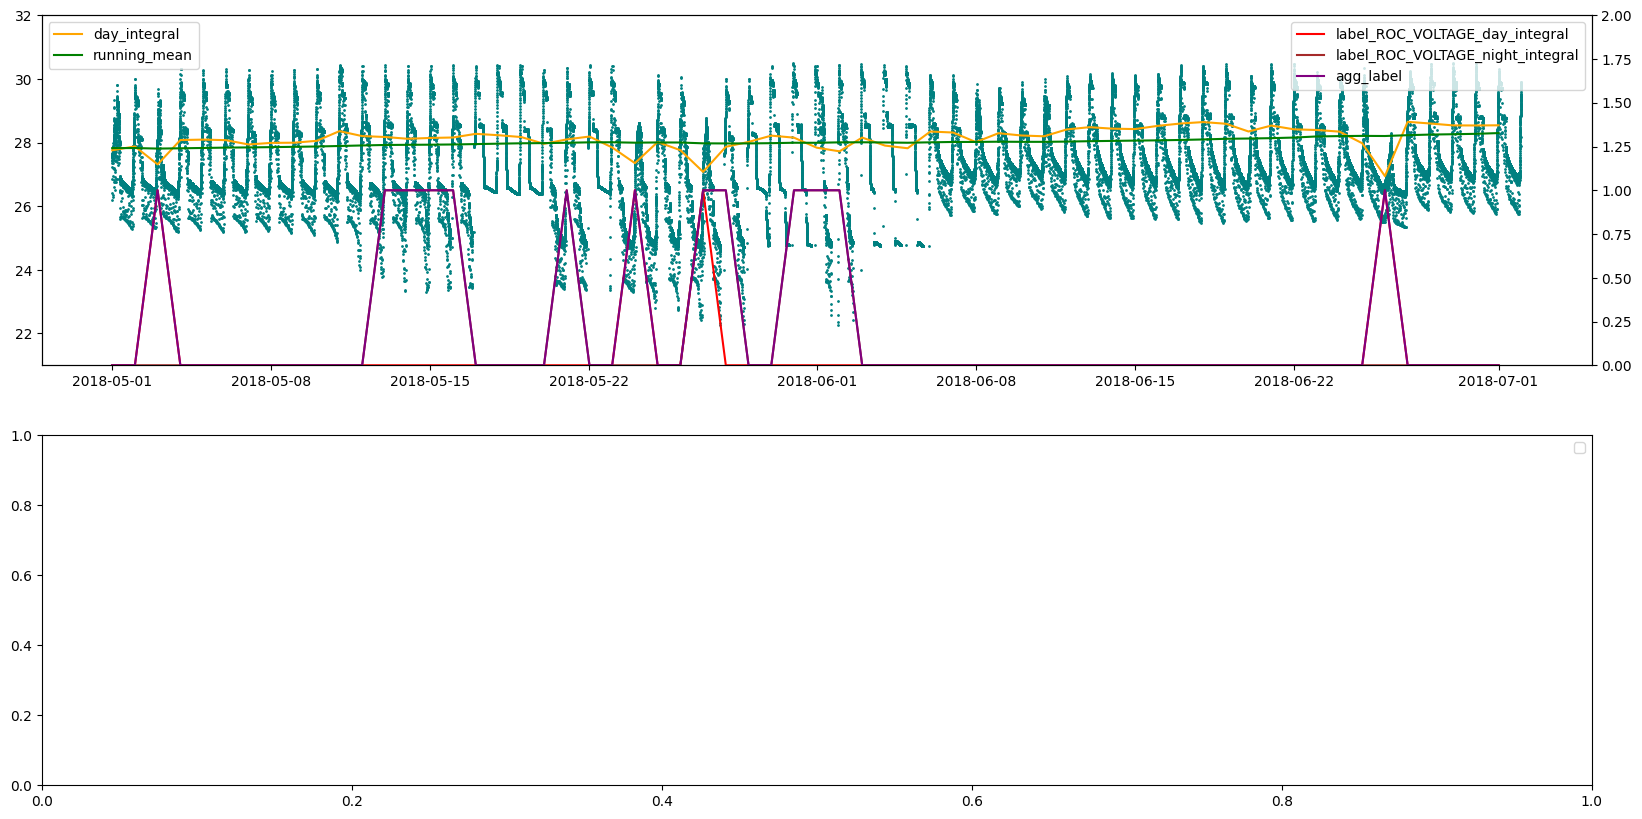

In [32]:
start='2018-05-01'
end='2018-07-01'

fig, ax = plt.subplots(2,figsize=(20,10))
ax[0].scatter(df.loc[start:end].index,df.loc[start:end,'ROC_VOLTAGE'],s=1,c='teal')
ax[0].plot(agg_df.loc[start:end,'ROC_VOLTAGE_day_integral'],c='orange',label='day_integral')
ax[0].plot(rolling_mean.loc[start:end,'ROC_VOLTAGE_day_integral'],c='g',label='running_mean')
axt0 = ax[0].twinx()
axt0.plot(label.loc[start:end,'ROC_VOLTAGE_day_integral'],label='label_ROC_VOLTAGE_day_integral',c='r')
axt0.plot(label.loc[start:end,'ROC_VOLTAGE_night_integral'],label='label_ROC_VOLTAGE_night_integral',c='brown')
axt0.plot(label.loc[start:end,'agg_label'],label='agg_label',c='purple')


ax[0].set_ylim([21,32])
axt0.set_ylim([0,2])

ax[0].legend()
ax[1].legend()
axt0.legend()
plt.show()


In [98]:
label = get_weather_label(sub_df,rolling_mean,rolling_std,{'ROC_VOLTAGE_day_integral':"lt",'cloudcover_day_integral':"gt",'direct_radiation_day_integral':"lt"},2.3)

In [93]:
label

,ROC_VOLTAGE_day_integral,cloudcover_day_integral,direct_radiation_day_integral,agg_label
2016-06-29,0,0,0,0
2016-06-30,0,0,0,0
2016-07-01,0,0,0,0
2016-07-02,0,0,0,0
2016-07-03,0,0,0,0
...,...,...,...,...
2022-07-07,1,0,1,0
2022-07-08,1,0,1,0
2022-07-09,1,0,1,0
2022-07-10,1,0,1,0


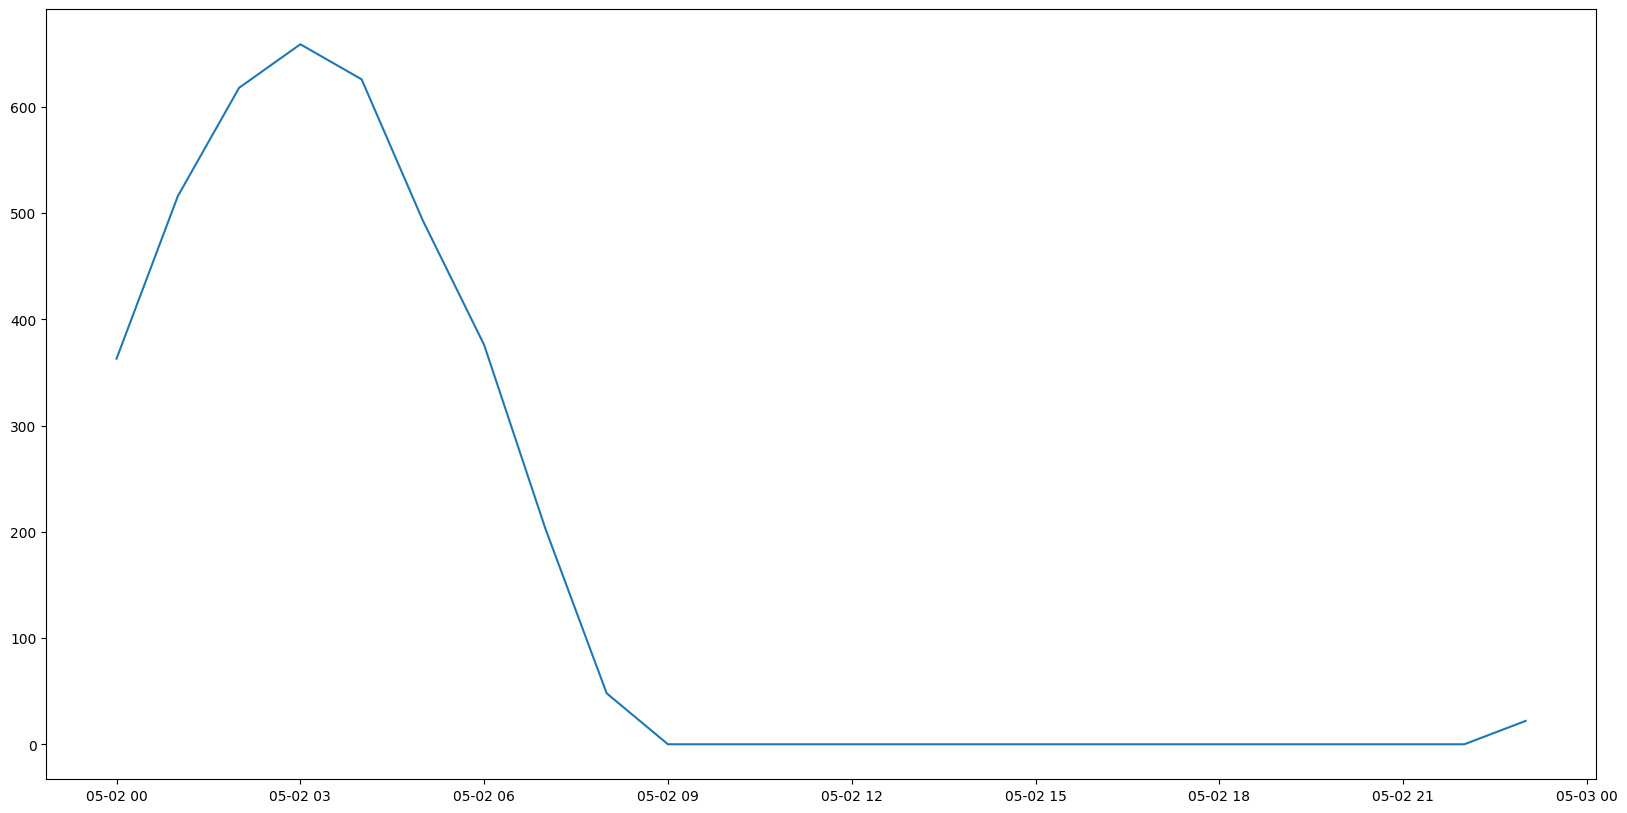

In [78]:
plt.figure(figsize=(20,10))
plt.plot(weather_df.loc["2018-05-02",'direct_radiation'])

In [81]:
weather_df.loc["2018-05-02",'direct_radiation'][:12]

TS
2018-05-02 00:00:00    363.0
2018-05-02 01:00:00    516.0
2018-05-02 02:00:00    618.0
2018-05-02 03:00:00    659.0
2018-05-02 04:00:00    626.0
2018-05-02 05:00:00    493.0
2018-05-02 06:00:00    376.0
2018-05-02 07:00:00    203.0
2018-05-02 08:00:00     48.0
2018-05-02 09:00:00      0.0
2018-05-02 10:00:00      0.0
2018-05-02 11:00:00      0.0
Name: direct_radiation, dtype: float64

In [ ]:
well_id = "TIRRW1"
df = pd.read_csv(Path.data(f"{well_id}_2016-01-01_2023-01-01_raw.csv"),parse_dates=['TS'],index_col='TS')
agg_df_ = df.groupby(df.index.date)
agg_df = agg_df_.agg(list)

In [193]:
start = '2018-05-11'
end = '2018-05-16'

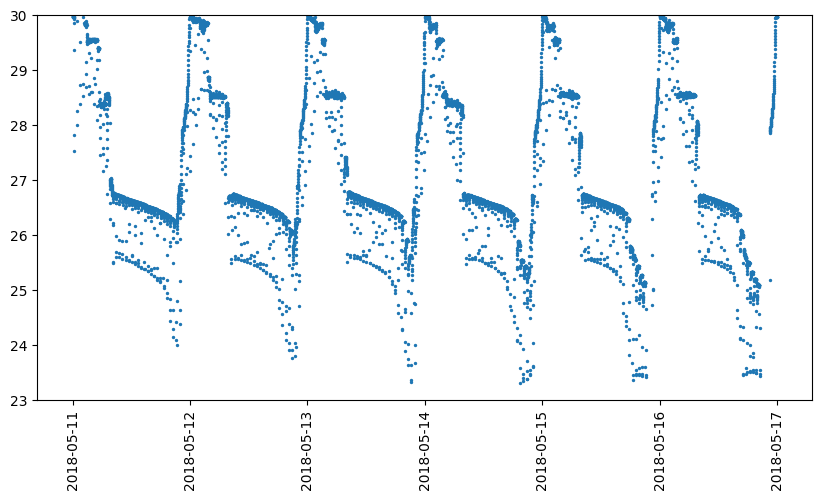

In [194]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df.loc[start:end,:].index, df.ROC_VOLTAGE.loc[start:end],s=2)
plt.ylim([23,30])
plt.xticks(rotation=90)
plt.show()

In [195]:
data = np.array(agg_df_transform.ROC_VOLTAGE.loc['2018-05-13'][600:1300])
y = data.reshape(-1,1)
X = np.arange(len(y)).reshape(-1,1)
model= KMeans(n_clusters=2).fit(y)
label = model.predict(y)

label_count = np.argmax(np.unique(label,return_counts=True)[1])
X_ = X[label==label_count]
y_ = y[label==label_count]
reg = LinearRegression(fit_intercept=True).fit(X_,y_)
reg.coef_, reg.intercept_,reg.score(X_,y_)

y_p = reg.predict(X)

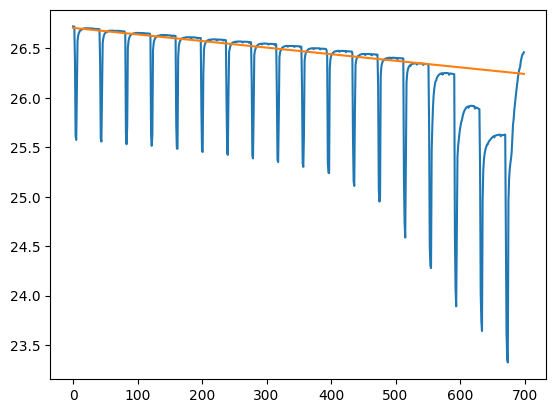

In [196]:
plt.plot(X,y)
plt.plot(X,y_p)

In [197]:
y_diff = np.diff(y,axis=0,n=4)

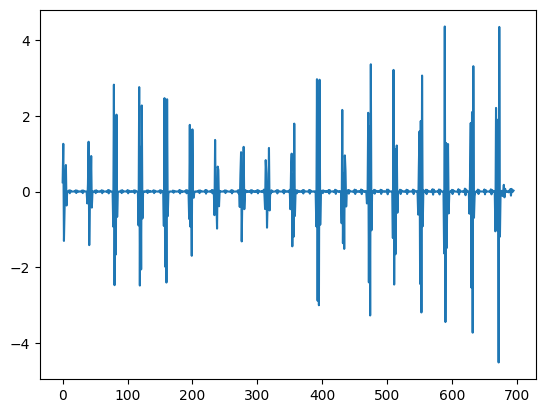

In [198]:
plt.plot(y_diff)

In [199]:
y_diff_pad = np.pad(y_diff.reshape(-1,),pad_width=(4,0),mode='constant',constant_values=0)

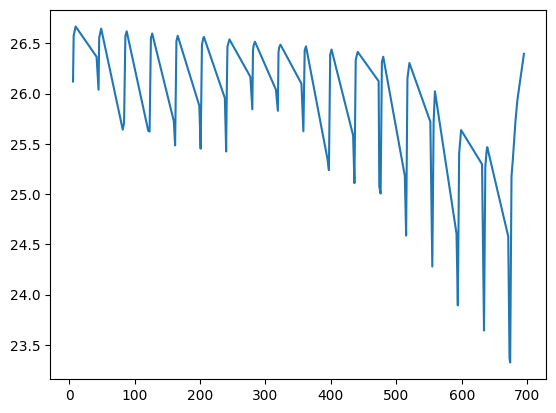

In [200]:
thres = -0.1
# plt.plot(X,y)
plt.plot(X[y_diff_pad<thres],y[y_diff_pad<thres])